#Access Google Colab

In [ ]:
from google.colab import drive

#Authentication

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/MyDrive/Tweet_Sentiment_Analysis"

 Bitcoin_tweets.csv  'Sentiment Analysis.gdoc'


In [ ]:
!unzip "/content/drive/MyDrive/Bitcoin_tweets.csv.zip"

unzip:  cannot find or open /content/drive/MyDrive/Bitcoin_tweets.csv.zip, /content/drive/MyDrive/Bitcoin_tweets.csv.zip.zip or /content/drive/MyDrive/Bitcoin_tweets.csv.zip.ZIP.


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/Tweet_Sentiment_Analysis_database/Bitcoin_tweets.csv')

In [ ]:
from datetime import datetime
df = df[df.slice_indexer("2020-01-07", "2021-01-17")]

In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

class TwitterClient(object):
	'''
	Generic Twitter Class for sentiment analysis.
	'''
	def __init__(self):
		'''
		Class constructor or initialization method.
		'''
		# keys and tokens from the Twitter Dev Console
		consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
		consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
		access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
		access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'

		# attempt authentication
		try:
			# create OAuthHandler object
			self.auth = OAuthHandler(consumer_key, consumer_secret)
			# set access token and secret
			self.auth.set_access_token(access_token, access_token_secret)
			# create tweepy API object to fetch tweets
			self.api = tweepy.API(self.auth)
		except:
			print("Error: Authentication Failed")

	def clean_tweet(self, tweet):
		'''
		Utility function to clean tweet text by removing links, special characters
		using simple regex statements.
		'''
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

	def get_tweet_sentiment(self, tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(self.clean_tweet(tweet))
		# set sentiment
		if analysis.sentiment.polarity > 0:
			total_positive = +1
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			total_neutral = +1
			return 'neutral'
		else:
			total_negative = +1
			return 'negative'

	def get_tweets(self, query, count = 10):
		'''
		Main function to fetch tweets and parse them.
		'''
		# empty list to store parsed tweets
		tweets = []

		try:
			# call twitter api to fetch tweets
			fetched_tweets = self.api.search(q = query, count = count)

			# parsing tweets one by one
			for tweet in fetched_tweets:
				# empty dictionary to store required params of a tweet
				parsed_tweet = {}

				# saving text of tweet
				parsed_tweet['text'] = tweet.text
				# saving sentiment of tweet
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

				# appending parsed tweet to tweets list
				if tweet.retweet_count > 0:
					# if tweet has retweets, ensure that it is appended only once
					if parsed_tweet not in tweets:
						tweets.append(parsed_tweet)
				else:
					tweets.append(parsed_tweet)

			# return parsed tweets
			total_tweets = tweets
			return tweets

		except tweepy.TweepError as e:
			# print error (if any)
			print("Error : " + str(e))

# creating object of TwitterClient Class
api = TwitterClient()
# calling function to get tweets
tweets = api.get_tweets(query = 'Bitcoin_tweets', count = 20000)
total_positive = 0
total_negative = 0
total_neutral = 0
total_tweets = 0
total_positive_date = []
total_negative_date = []
date_array = []

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([total_neutral, total_positive, total_negative])

plt.pie(y)
plt.show() 

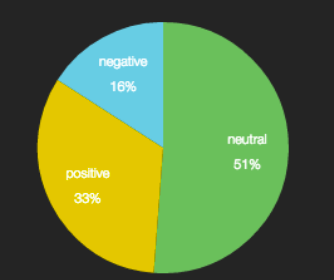

In [ ]:
import matplotlib.pyplot as plt
x_positive = date_array
y_positive = total_positive_date
plt.plot(x_positive,y_positive, label = 'positive',color='red', lw=2,markerfacecolor='red',marker='--', ms=7) # dashed line style

x_negative = date_array
y_negative = total_negative_date
plt.plot(x_negative,y_negative, label = 'negative',color='blue', lw=2,markerfacecolor='blue',marker='-', ms=7) #  line style

plt.yticks([0, 2000, 4000, 6000, 8000, 10000,12000, 14000, 16000, 18000])
plt.grid(True)
plt.legend(loc='center')
plt.show()

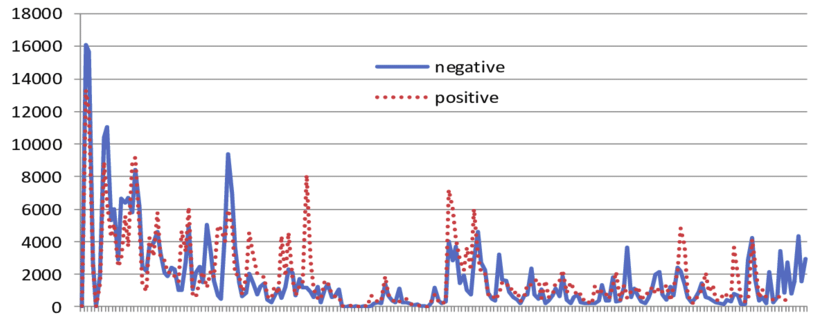